# Import Data Science Libraries

To get started, we need to import the data science libraries. We will use numpy to create data or pandas to read in data from a csv file:

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

# Import Data

We will use pandas to read in data as a dataframe ```df```. The CSV file is stored in the subfolder data:

In [3]:
df = pd.read_csv("./data/2010YumaAz.csv")
df.head()

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,25.2
1,20100601,TUESDAY,1:00,24.1
2,20100601,TUESDAY,2:00,24.4
3,20100601,TUESDAY,3:00,24.9
4,20100601,TUESDAY,4:00,22.8


Let's create a list of days beginning from "TUESDAY":

In [4]:
days = ["TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY", "MONDAY"]

Let's select a day from the list:

In [21]:
day = days[0]
day

'TUESDAY'

Now let's look at the data for the day:

In [22]:
df[df["DAY"] == day].head()

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,25.2
1,20100601,TUESDAY,1:00,24.1
2,20100601,TUESDAY,2:00,24.4
3,20100601,TUESDAY,3:00,24.9
4,20100601,TUESDAY,4:00,22.8


Then select the series we want to plot for that day:

In [23]:
df[df["DAY"] == day]["LST_TIME"].head()

0    0:00
1    1:00
2    2:00
3    3:00
4    4:00
Name: LST_TIME, dtype: object

In [24]:
df[df["DAY"] == day]["T_HR_AVG"].head()

0    25.2
1    24.1
2    24.4
3    24.9
4    22.8
Name: T_HR_AVG, dtype: float64

# Plotting

We can use list comprehension to setup data as a list of traces:

In [28]:
data = [go.Scatter(x=df[df["DAY"] == day]["LST_TIME"], y=df[df["DAY"] == day]["T_HR_AVG"], mode="markers+lines", name=f"{day}") for day in days]
data

[Scatter({
     'mode': 'markers+lines',
     'name': 'TUESDAY',
     'x': array(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
                 '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
                 '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
                dtype=object),
     'y': array([25.2, 24.1, 24.4, 24.9, 22.8, 19.8, 18.8, 21.2, 24.2, 27.1, 29.3, 30.6,
                 32.6, 34. , 34. , 34.9, 34.6, 33.8, 33.5, 32.8, 31. , 29. , 27.6, 26.3])
 }),
 Scatter({
     'mode': 'markers+lines',
     'name': 'WEDNESDAY',
     'x': array(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
                 '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
                 '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
                dtype=object),
     'y': array([23.8, 20.6, 19.1, 18.4, 18.9, 18.2, 17.9, 20.2, 23.8, 26.1, 27.9, 29.3,
                 

Now we can setup the layout:

In [25]:
layout = go.Layout(title="Line Charts", 
                   xaxis=dict(title="time (hours)"), 
                   yaxis=dict(title="temperature (℃)"), 
                   hovermode="closest")

We can now creat a figure usign the data and layout:

In [26]:
fig = go.Figure(data=data, layout=layout)

We can plot this:

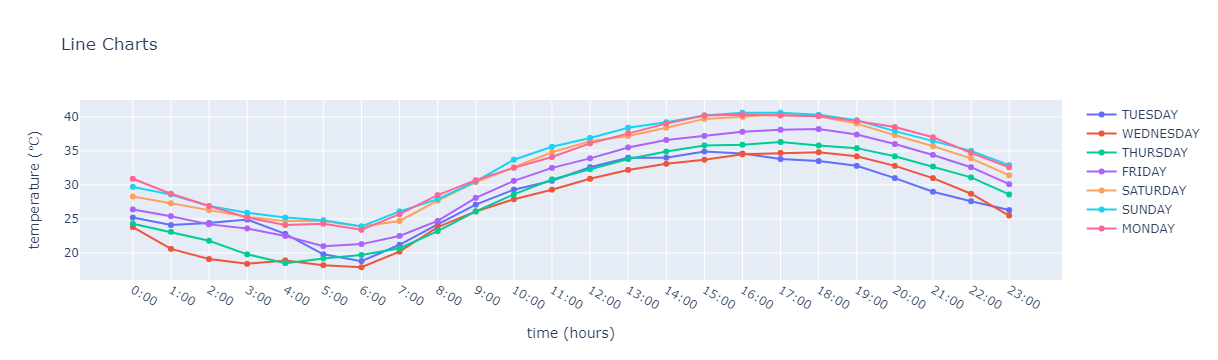

In [29]:
pyo.iplot(fig)